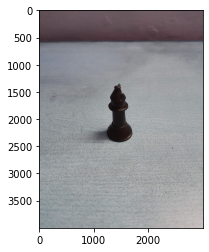

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"
CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

for category in CATEGORIES : 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img) )  # cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        break
    break

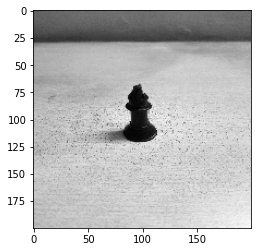

In [2]:
IMG_SIZE = 200

new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
gray  = gray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)

plt.imshow(gray , cmap="gray")
plt.show()

In [3]:
training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :
            
            
            img_array = cv2.imread(os.path.join(path,img)) # cv2.IMREAD_GRAYSCALE
                
            new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)
            training_data.append([new_array  , class_num])
            
            
        
create_training_data()

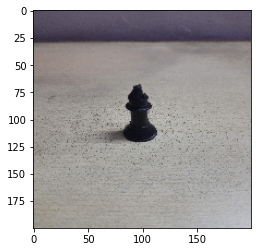

In [4]:
new_image = cv2.cvtColor(training_data[0][0] , cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [5]:
import random
random.shuffle(training_data)

Text(0.5, 1.0, 'Black_Bishop')

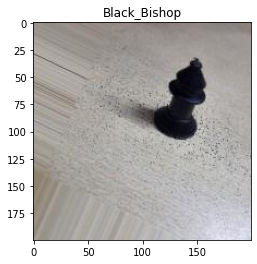

In [9]:
import random

index = random.randint(0,2520)
img_arr = cv2.cvtColor(training_data[index][0] , cv2.COLOR_BGR2RGB)




y = training_data[index][1]

plt.imshow(img_arr , cmap="gray")
plt.title(CATEGORIES[y])

In [10]:
#training_data

In [11]:
X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 3) 

In [12]:
X = X/255.0

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [14]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [15]:
len(X_train) , len(y_train) 

(2016, 2016)

In [16]:
len(X_test) , len(y_test)

(504, 504)

In [17]:
X

array([[[[0.22352941, 0.14117647, 0.17254902],
         [0.18431373, 0.11372549, 0.14117647],
         [0.22352941, 0.14901961, 0.16078431],
         ...,
         [0.28235294, 0.20784314, 0.21960784],
         [0.29019608, 0.21568627, 0.22745098],
         [0.29803922, 0.22352941, 0.23529412]],

        [[0.15294118, 0.08235294, 0.10980392],
         [0.21568627, 0.14509804, 0.17254902],
         [0.24705882, 0.17647059, 0.20392157],
         ...,
         [0.29411765, 0.2       , 0.23137255],
         [0.29411765, 0.20392157, 0.21960784],
         [0.27843137, 0.20392157, 0.21568627]],

        [[0.07058824, 0.02745098, 0.03529412],
         [0.07058824, 0.0627451 , 0.0627451 ],
         [0.16078431, 0.10588235, 0.11372549],
         ...,
         [0.27058824, 0.18823529, 0.21960784],
         [0.25882353, 0.18431373, 0.19607843],
         [0.25490196, 0.18039216, 0.19215686]],

        ...,

        [[0.45098039, 0.49411765, 0.50980392],
         [0.46666667, 0.50980392, 0.5254902 ]


 CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , "Black_King" , "White_King", "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

In [18]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])

#3. Learning Rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10)**(epoch/20))

#4. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        callbacks = [lr_schedular] ,
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 18s 114ms/step - loss: 2.4963 - accuracy: 0.0784 - val_loss: 2.5071 - val_accuracy: 0.0635 - lr: 1.0000e-04
Epoch 2/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4972 - accuracy: 0.0764 - val_loss: 2.5009 - val_accuracy: 0.0794 - lr: 1.1220e-04
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.4954 - accuracy: 0.0794 - val_loss: 2.5086 - val_accuracy: 0.0873 - lr: 1.2589e-04
Epoch 4/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4962 - accuracy: 0.0898 - val_loss: 2.5022 - val_accuracy: 0.0893 - lr: 1.4125e-04
Epoch 5/50
63/63 [==============================] - 6s 96ms/step - loss: 2.4708 - accuracy: 0.0933 - val_loss: 2.3827 - val_accuracy: 0.1984 - lr: 1.5849e-04
Epoch 6/50
63/63 [==============================] - 6s 94ms/step - loss: 2.2352 - accuracy: 0.1994 - val_loss: 2.0625 - val_accuracy: 0.2560 - lr: 1.7783e-04
Epoch 7/50
63/63 [==============================] 

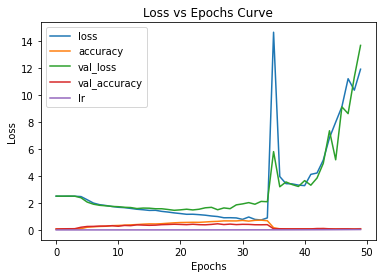

In [23]:
# Plot the loss vs epochs diagram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs Curve")
plt.show()

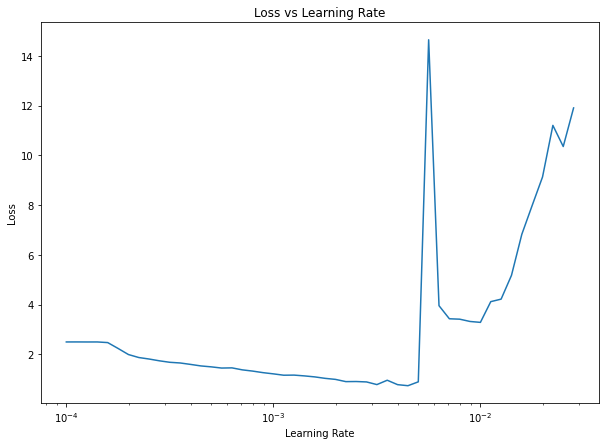

In [27]:
# Plot Loss vs Learning Rate curve

lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")
plt.show()



In [28]:
# Ideal learning rate seems to be around 5*(10**(-3))

In [29]:
y_preds = tf.constant(cnn_model.predict(X_test))

In [30]:
y_preds_int = pd.DataFrame(tf.argmax(y_preds , axis = 1))
len(y_preds_int)

504

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_preds_int)

0.07738095238095238

In [36]:
# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 7s 98ms/step - loss: 2.5706 - accuracy: 0.0853 - val_loss: 2.6456 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5484 - accuracy: 0.0858 - val_loss: 2.3526 - val_accuracy: 0.1905
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 2.0110 - accuracy: 0.2197 - val_loss: 1.9758 - val_accuracy: 0.1746
Epoch 4/50
63/63 [==============================] - 6s 92ms/step - loss: 1.7655 - accuracy: 0.2907 - val_loss: 1.7671 - val_accuracy: 0.2718
Epoch 5/50
63/63 [==============================] - 6s 92ms/step - loss: 1.6243 - accuracy: 0.3517 - val_loss: 1.6769 - val_accuracy: 0.2698
Epoch 6/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4967 - accuracy: 0.3899 - val_loss: 1.5979 - val_accuracy: 0.3631
Epoch 7/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4362 - accuracy: 0.4286 - val_loss: 1.5511 - val_accuracy: 0.3790
Epoch 8/50
63

In [38]:
# Changing the network architecture

# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'softmax' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same'),

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 7s 97ms/step - loss: 2.5709 - accuracy: 0.0878 - val_loss: 2.6476 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 92ms/step - loss: 2.5621 - accuracy: 0.0784 - val_loss: 2.5172 - val_accuracy: 0.0794
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.5455 - accuracy: 0.0843 - val_loss: 2.6612 - val_accuracy: 0.0675
Epoch 4/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5768 - accuracy: 0.0898 - val_loss: 2.6847 - val_accuracy: 0.0833
Epoch 5/50
63/63 [==============================] - 6s 95ms/step - loss: 2.5699 - accuracy: 0.0878 - val_loss: 2.5949 - val_accuracy: 0.0873
Epoch 6/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5537 - accuracy: 0.0828 - val_loss: 2.5946 - val_accuracy: 0.0833
Epoch 7/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5799 - accuracy: 0.0774 - val_loss: 2.5787 - val_accuracy: 0.0794
Epoch 8/50
63